In [15]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import FastICA as ICA
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.feature_selection import f_classif



In [16]:
iris = load_iris()
X = iris.data
y = iris.target

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# PCA

In [19]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

model_pca = LogisticRegression(random_state=42)
model_pca.fit(X_train_pca, y_train)
y_pred_pca = model_pca.predict(X_test_pca)
print("PCA Accuracy:", accuracy_score(y_test, y_pred_pca))

PCA Accuracy: 0.9111111111111111


# LDA

In [20]:
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

model_lda = LogisticRegression(random_state=42)
model_lda.fit(X_train_lda, y_train)
y_pred_lda = model_lda.predict(X_test_lda)
print("LDA Accuracy:", accuracy_score(y_test, y_pred_lda))

LDA Accuracy: 1.0


# ICA

In [21]:
ica = ICA(n_components=2, random_state=42)
X_train_ica = ica.fit_transform(X_train)
X_test_ica = ica.transform(X_test)

model_ica = LogisticRegression(random_state=42)
model_ica.fit(X_train_ica, y_train)
y_pred_ica = model_ica.predict(X_test_ica)
print("ICA Accuracy:", accuracy_score(y_test, y_pred_ica))

ICA Accuracy: 0.9555555555555556


# t-SNE

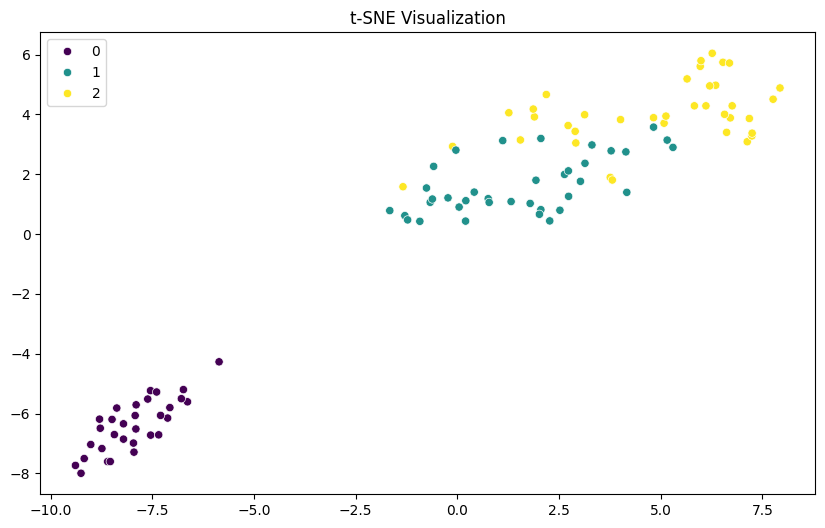

In [22]:
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], hue=y_train, palette='viridis')
plt.title("t-SNE Visualization")
plt.show()

# Feature Selection using SelectKBest

In [23]:
select_k_best = SelectKBest(f_classif, k=2)
X_train_kbest = select_k_best.fit_transform(X_train, y_train)
X_test_kbest = select_k_best.transform(X_test)
model_kbest = LogisticRegression(random_state=42)
model_kbest.fit(X_train_kbest, y_train)
y_pred_kbest = model_kbest.predict(X_test_kbest)
print("SelectKBest (f_classif) Accuracy:", accuracy_score(y_test, y_pred_kbest))

SelectKBest (f_classif) Accuracy: 1.0


# Feature Selection using Recursive Feature Elimination (RFE)

In [24]:
model_rfe = LogisticRegression(random_state=42)
rfe = RFE(model_rfe, n_features_to_select=2)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)
model_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = model_rfe.predict(X_test_rfe)
print("RFE Accuracy:", accuracy_score(y_test, y_pred_rfe))

RFE Accuracy: 1.0


In [25]:
print("Comparison of Model Accuracies:")
print(f"PCA: {accuracy_score(y_test, y_pred_pca)}")
print(f"LDA: {accuracy_score(y_test, y_pred_lda)}")
print(f"ICA: {accuracy_score(y_test, y_pred_ica)}")
print(f"SelectKBest: {accuracy_score(y_test, y_pred_kbest)}")
print(f"RFE: {accuracy_score(y_test, y_pred_rfe)}")

Comparison of Model Accuracies:
PCA: 0.9111111111111111
LDA: 1.0
ICA: 0.9555555555555556
SelectKBest: 1.0
RFE: 1.0
